In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

from brian2 import *
import syncological as sync
from syncological import ei2
import os, sys
from fakespikes import neurons, util, rates

In [2]:
seed = 42
stim_seed = seed

# ------------------------------------------------------------
# Model params
name = 'test'

I_e = 0.2
I_i = 0.1

w_e = 5.0
w_i = 0.5

w_ee = 0.5
w_ii = 0.1
w_ei = 1.0
w_ie = 3.0

# ------------------------------------------------------------
# Create input
N_stim = 100
n_stim = N_stim

# Load v1 rate data (1 ms resoultion)
dt = 1e-3
v1 = np.load(os.path.join(sync.__path__[0], 'data', 'no_opto_rates.npz'))
stim = v1['rate']
stim_times = v1['times']

# Select 1-3 seconds, the visual stimulation period
m = np.logical_and(stim_times > 1, stim_times <= 3)
stim = stim[m]
stim_times = stim_times[m]

# Renorm stim_times to 0 + 0.1 s
stim_times -= stim_times.min()
stim_times += 0.1

# Pad with 0.1 s of zeros
stim_times = np.concatenate([
        np.zeros(int(np.ceil(0.1 * (1 / dt))) - 1), 
        stim_times
    ])
stim = np.concatenate([
        np.zeros(int(np.ceil(0.1 * (1 / dt))) - 1), 
        stim
    ])

# Create Poisson firing, mocking up
# the stimulus.
time = stim_times.max()
nrns = neurons.Spikes(n_stim, time, dt=dt, seed=stim_seed)

z = 5  # rate multplier (very few neurons in this model)
spks_stim = nrns.poisson(z * stim)

ns, ts = util.to_spiketimes(nrns.times, spks_stim)     


# ------------------------------------------------------------
# Run
result = ei2.model(name, time, N_stim, ts, ns, 
         w_e, w_i, w_ei, w_ie, w_ee, w_ii,
         I_e=I_e, I_i=I_i, verbose=True, seed=seed)

# ------------------------------------------------------------
# Unpack results
spikes_e = result['spikes_e']
spikes_stim = result['spikes_stim']
spikes_i = result['spikes_i']
pop_e = result['pop_e']
pop_stim = result['pop_stim']
traces_e = result['traces_e']
traces_i = result['traces_i']

ts_e = spikes_e.t_[:]
ts_stim = spikes_stim.t_[:]

ns_e = spikes_e.i_[:]
ns_stim = spikes_stim.i_[:]

ts_i = spikes_i.t_[:]
ns_i = spikes_i.i_[:]

v_e = traces_e.V_[:]
v_i = traces_i.V_[:]

WARNING    /home/ejp/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:32: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 4999 but corresponding boolean dimension is 5000
 [py.warnings]



>>> Running
Starting simulation at t=0. s for a duration of 2.09939988 s
82.55 ms (3%) simulated in 10s, estimated 4m 4s remaining.
164.29 ms (7%) simulated in 20s, estimated 3m 56s remaining.
246.08 ms (11%) simulated in 30s, estimated 3m 46s remaining.
0.32769 s (15%) simulated in 40s, estimated 3m 37s remaining.
0.40995 s (19%) simulated in 50s, estimated 3m 26s remaining.
0.49156 s (23%) simulated in 1m 0s, estimated 3m 17s remaining.
0.57326 s (27%) simulated in 1m 10s, estimated 3m 7s remaining.
0.65516 s (31%) simulated in 1m 20s, estimated 2m 57s remaining.
0.73552 s (35%) simulated in 1m 30s, estimated 2m 47s remaining.
0.81744 s (38%) simulated in 1m 40s, estimated 2m 37s remaining.
0.89949 s (42%) simulated in 1m 50s, estimated 2m 27s remaining.
0.98108 s (46%) simulated in 2m 0s, estimated 2m 17s remaining.
1.06208 s (50%) simulated in 2m 10s, estimated 2m 7s remaining.
1.14403 s (54%) simulated in 2m 20s, estimated 1m 57s remaining.
1.22548 s (58%) simulated in 2m 30s, est

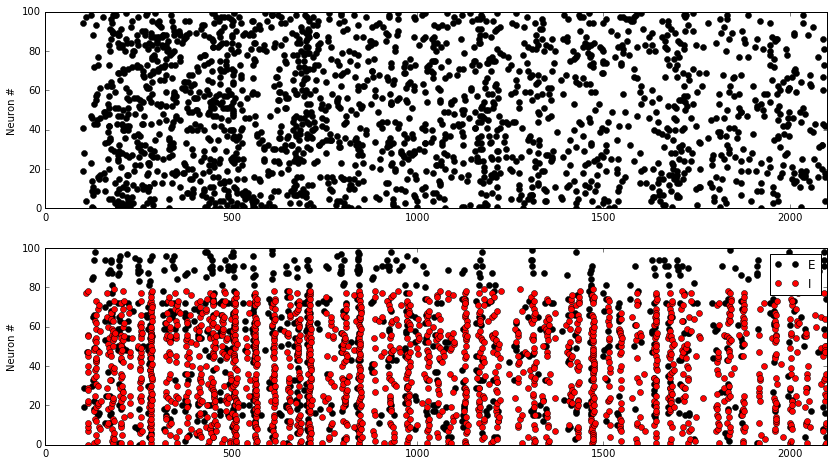

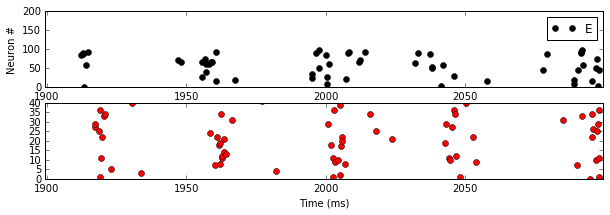

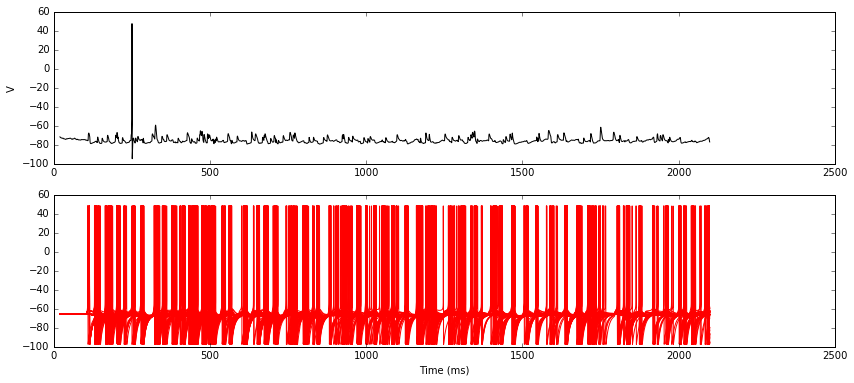

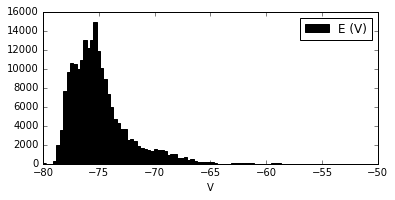

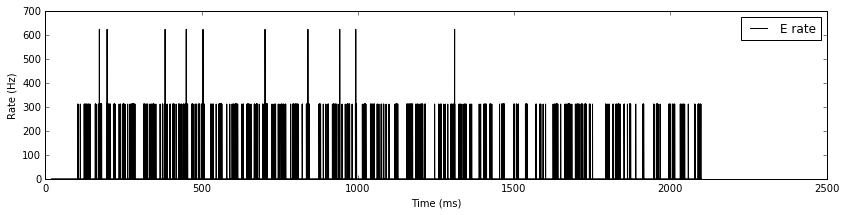

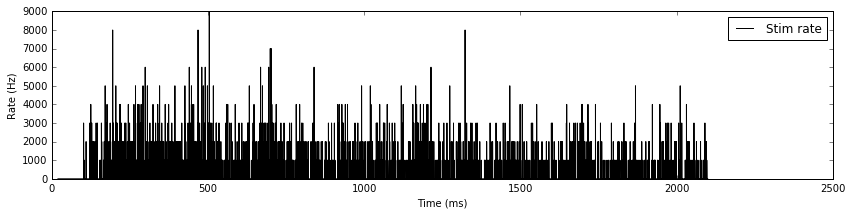

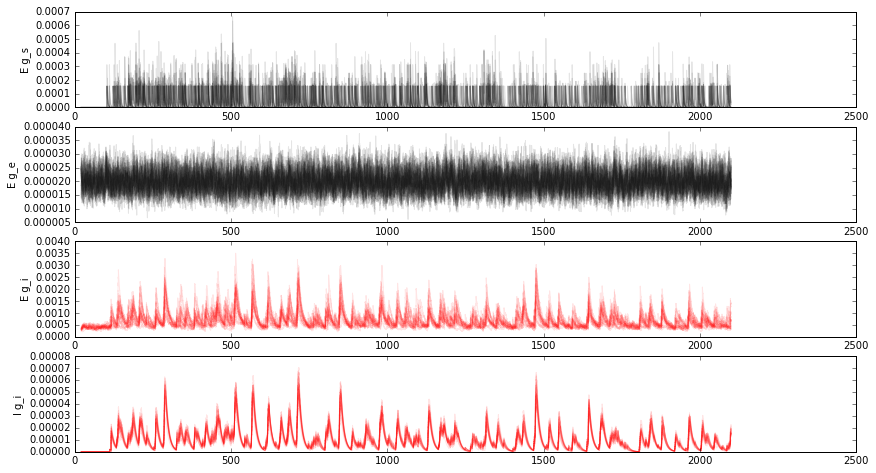

In [11]:
# ------------------------------------------------------------
# Raster full
close()
t_min = 0
t_max = time

figure(figsize=(14, 12))
subplot(311)
plot(spikes_stim.t/ms, spikes_stim.i, 'o', label='', color='k')
xlim(t_min * 1000, t_max * 1000)
ylabel("Neuron #")
legend()

subplot(312)
plot(spikes_e.t/ms, spikes_e.i, 'o', label='E', color='k')
plot(spikes_i.t/ms, spikes_i.i, 'o', label='I', color='r')
xlim(t_min * 1000, t_max * 1000)
ylabel("Neuron #")
legend()


# Raster zoom
figure(figsize=(10, 3))
subplot(211)
plot(spikes_e.t/ms, spikes_e.i, 'o', label='E', color='k')
ylabel("Neuron #")
ylim(0, 200)
xlim(t_max * 1000 - 200, t_max * 1000)
legend()

subplot(212)
plot(spikes_i.t/ms, spikes_i.i, 'o', label='I', color='r')
xlabel("Time (ms)")
ylim(0, 40)
xlim(t_max * 1000 - 200, t_max * 1000)

# ------------------------------------------------------------
# V 
tn = 2000
figure(figsize=(14, 6))
subplot(211)
plot(traces_e.t[tn:]/ms, traces_e.V[0, tn:].T/mvolt, color='k')
# ylim(-90, -50)
ylabel("V")
legend()

subplot(212)
plot(traces_i.t[tn:]/ms, traces_i.V[:, tn:].T/mvolt, color='r')
xlabel("Time (ms)")
legend()

# V hist
figure(figsize=(6,6))
subplot(211)
hist(traces_e.V[0][tn:]/mvolt, label='E (V)', color='k', bins=100, range=(-80, -50))
xlabel("V")
legend()

# ------------------------------------------------------------
# E rate
figure(figsize=(14, 3))
plot(pop_e.t[tn:]/ms, pop_e.rate[tn:]/Hz, color='k', label='E rate')
ylabel('Rate (Hz)')
xlabel("Time (ms)")
legend()

figure(figsize=(14, 3))
plot(pop_stim.t[tn:]/ms, pop_stim.rate[tn:]/Hz, color='k', label='Stim rate')
ylabel('Rate (Hz)')
xlabel("Time (ms)")
legend()

# ------------------------------------------------------------
figure(figsize=(14, 12))
subplot(611)
plot(traces_e.t[tn:]/ms, traces_e.g_s[1:20, tn:].T, color='k', alpha=0.1)
ylabel("E g_s")

subplot(612)
plot(traces_e.t[tn:]/ms, traces_e.g_e[1:20, tn:].T, color='k', alpha=0.1)
ylabel("E g_e")

subplot(613)
plot(traces_e.t[tn:]/ms, traces_e.g_i[1:20, tn:].T, color='r', alpha=0.1)
ylabel("E g_i")

subplot(614)
plot(traces_i.t[tn:]/ms, traces_i.g_i[1:20, tn:].T, color='r', alpha=0.1)
ylabel("I g_i")
# legend(loc='best')


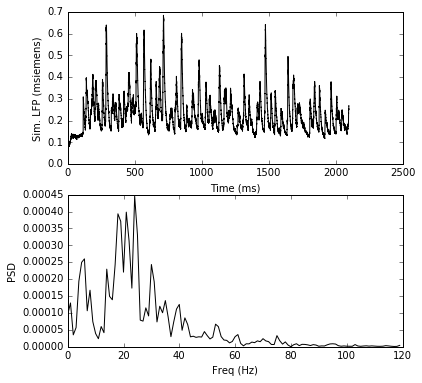

In [10]:
# # ------------------------------------------------------------
# # Spectra
lfp = (np.abs(traces_e.g_s.sum(0)) + np.abs(traces_e.g_ee.sum(0)) + np.abs(traces_e.g_i.sum(0)))
lfp = lfp[1000:]  # Drop initial spike

figure(figsize=(6,6))
subplot(211)
plot(traces_i.t[1000:]/ms, lfp, color='k',  label='LFP')
xlabel("Time (ms)")
ylabel("Sim. LFP (msiemens)")

subplot(212)
fs, spec = util.create_psd(lfp, 1/result['dt'])
plot(fs[fs < 120], spec[fs < 120], color='k')
xlabel("Freq (Hz)") 
ylabel("PSD")

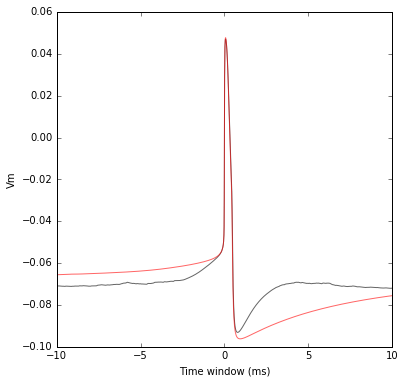

In [9]:
# # ------------------------------------------------------------
# STA
figure(figsize=(6,6))
sta_e, bins_sta_e = util.spike_triggered_average(ts_e, ns_e, v_e, (0, time), 10e-3, 1/1e-5)
sta_i, bins_sta_i = util.spike_triggered_average(ts_i, ns_i, v_i, (0, time), 10e-3, 1/1e-5)

plt.plot(bins_sta_e*1000, sta_e, color='k', alpha=0.6)
plt.plot(bins_sta_i*1000, sta_i, color='r', alpha=0.6)
plt.xlabel("Time window (ms)")
plt.ylabel("Vm")